# America's Pastime
From: https://fivethirtyeight.com/features/can-you-turn-americas-pastime-into-a-game-of-yahtzee/
In this notebook, the classic riddler will be solved in two different ways: by Monte Carlo Simulation and by Markov Chains.
First, for the Monte Carlo, we set up our game:

In [108]:
import random
rolls={
    (1, 1): 'double',
    (1, 2): 'single',
    (1, 3): 'single',
    (1, 4): 'single',
    (1, 5): 'base on error',
    (1, 6): 'base on balls',
    (2, 2): 'strike',
    (2, 3): 'strike',
    (2, 4): 'strike',
    (2, 5): 'strike',
    (2, 6): 'foul out',
    (3, 3): 'out at 1st',
    (3, 4): 'out at 1st',
    (3, 5): 'out at 1st',
    (3, 6): 'out at 1st',
    (4, 4): 'fly out',
    (4, 5): 'fly out',
    (4, 6): 'fly out',
    (5, 5): 'double play',
    (5, 6): 'triple',
    (6, 6): 'home run'
    }
def dice_roll():
    dice = tuple(sorted(random.choices(range(1,7),k=2)))
    roll_rslt = rolls[dice]
    return roll_rslt
class Play:
    def __init__(self, bases, strikes, outs, runs, inning):
        self.bases = bases
        self.strikes = strikes
        self.outs = outs
        self.runs = runs
        self.inning = inning
    @classmethod        
    def single(cls, self):
        new_bases = [1,self.bases[0],0]
        runs = self.bases[1]+self.bases[2]
        return cls(new_bases, 0, self.outs, self.runs+runs, self.inning)
    @classmethod
    def double(cls, self):
        new_bases = [0,1,self.bases[0]]
        runs = self.bases[1]+self.bases[2]
        return cls(new_bases, 0, self.outs, self.runs+runs, self.inning)
    @classmethod
    def base_on_errors(cls, self):
        #Assume all runners advance one base (as opposed to multiple if the ball is thrown out of play)
        new_bases = [1, self.bases[0], self.bases[1]]
        runs = self.bases[2]
        return cls(new_bases, 0, self.outs, self.runs+runs, self.inning)
    @classmethod
    def base_on_balls(cls, self):
        #Only advance runners if they are forced to
        new_bases = [1, self.bases[0], (self.bases[1]+self.bases[0])//2]
        runs = (self.bases[2]+self.bases[1]+self.bases[0])//3
        return cls(new_bases, 0, self.outs, self.runs+runs, self.inning)
    @classmethod
    def strike(cls, self):
        inning = self.inning
        bases = self.bases
        new_strikes = self.strikes
        if self.strikes == 2:
            new_outs = self.outs +1
            if new_outs == 3:
                new_outs = 0
                inning += 1
                bases = [0,0,0]
            new_strikes = 0
        else:
            new_outs = self.outs
            new_strikes +=1
        return cls(bases, new_strikes, new_outs, self.runs, inning)
    @classmethod
    def foul_out(cls, self):
        inning = self.inning
        bases = self.bases
        new_outs = self.outs +1
        if new_outs == 3:
            new_outs = 0
            inning += 1
            bases = [0,0,0]
        return cls(bases, 0, new_outs, self.runs, inning) 
    @classmethod
    def out_at_first(cls, self):
        inning = self.inning
        bases = self.bases
        new_outs = self.outs +1
        runs = self.runs
        #if three outs, no runs score
        if new_outs == 3:
            new_outs = 0
            inning += 1
            bases = [0,0,0]
        else:
            bases = [0, self.bases[0], self.bases[1]]
            runs += self.bases[2]
        return cls(bases, 0, new_outs, runs, inning) 
    @classmethod
    def fly_out(cls, self):
        inning = self.inning
        bases = self.bases
        new_outs = self.outs +1
        runs = self.runs
        if new_outs == 3:
            new_outs = 0
            inning += 1
            bases = [0,0,0]
        else:
            bases = [self.bases[0], self.bases[1],0]
            runs += self.bases[2]
        return cls(bases, 0, new_outs, runs, inning) 
    @classmethod
    def double_play(cls, self):
        inning = self.inning
        bases = self.bases
        new_outs = self.outs +1
        if not self.bases[0] == self.bases[1] == self.bases[2] == 0:
            new_outs += 1
        runs = self.runs
        if new_outs >= 3:
            new_outs = 0
            inning += 1
            bases = [0,0,0]
        else:
            if self.bases[0] == 1:
                bases = [0, 0, self.bases[1]]
                runs += self.bases[2]
            elif self.bases[2] == 1:
                bases = [0, 0, self.bases[1]]
            else:
                bases = [0, 0, 0]
        return cls(bases, 0, new_outs, runs, inning) 
    @classmethod
    def triple(cls, self):
        bases = [0,0,1]
        runs = self.bases[0] + self.bases[1]+self.bases[2]
        return cls(bases, 0, self.outs, self.runs+runs, self.inning)
    @classmethod
    def home_run(cls, self):
        bases = [0,0,0]
        runs = self.bases[0] + self.bases[1]+self.bases[2] + 1
        return cls(bases,0,self.outs,self.runs+runs, self.inning)
funcs = {
    'single':Play.single,
    'double':Play.double,
    'base on balls': Play.base_on_balls,
    'base on error': Play.base_on_errors,
    'strike': Play.strike,
    'foul out': Play.foul_out,
    'fly out': Play.fly_out,
    'out at 1st': Play.out_at_first,
    'double play': Play.double_play,
    'triple': Play.triple,
    'home run': Play.home_run
}


Now, we can play our game:

In [77]:
team = Play([0,0,0],0,0,0,0)
while team.inning <= 9:
    dice = dice_roll()
    team = funcs[dice](team)
print(team.runs)

8


Great! Now let's add in another team and see how they do against each other:

In [78]:
team1 = Play([0,0,0],0,0,0,0)
team2 = Play([0,0,0],0,0,0,0)
team = {1: team1, 2:team2}
runs = {1: 0, 2: 0}
for i in [1, 2]:
    while team[i].inning <= 9:
        dice = dice_roll()
        team[i] = funcs[dice](team[i])
    runs[i] = team[i].runs
print(runs)

{1: 15, 2: 15}


Now we can play games! First, we have to add in two pieces of information about baseball: there are no ties, and if one team is ahead, the bottom of the 9th inning is not played. Let's make team 2 the home team, and play a full season (162 games):

Mean: 13.8703703704
Std. Dev: 5.55070776144


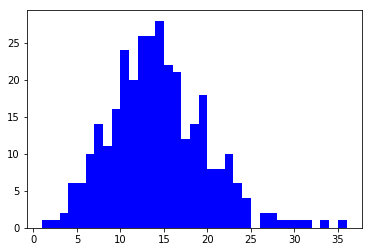

In [79]:
import numpy as np
import matplotlib.pyplot as plt
runs_list = []
for j in range(162):
    team1 = Play([0,0,0],0,0,0,1)
    team2 = Play([0,0,0],0,0,0,1)
    team = {1: team1, 2:team2}
    runs = {1: 0, 2: 0}
    ot = 0
    while 1:
        for i in [1, 2]:
            if ot == 1:
                team[i].inning = 9
            while team[i].inning <= 9:
                if i == 2 and team2.inning == 8 and runs[2] > runs[1]:
                    break
                else:
                    dice = dice_roll()
                    team[i] = funcs[dice](team[i])
            runs[i] = team[i].runs
        if runs[1] == runs[2]:
            ot = 1
        else:
            break
    runs_list.extend([runs[1], runs[2]])
num_bins = max(runs_list)-min(runs_list)
print('Mean: %s\nStd. Dev: %s' %(np.average(runs_list), np.std(runs_list)))
n, bins, patches = plt.hist(runs_list, num_bins, facecolor='blue')
plt.show()

Our data seems to be centered somewhere around 14 runs. Let's try bumping up our number of samples to a million and see if we can make our data look closer to a bell curve:

Mean: 13.8464835
Std. Dev: 5.87075558887


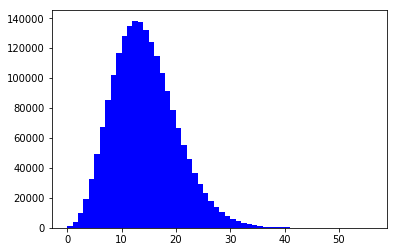

In [110]:
runs_list = []
for j in range(1000000):
    team1 = Play([0,0,0],0,0,0,1)
    team2 = Play([0,0,0],0,0,0,1)
    team = {1: team1, 2:team2}
    runs = {1: 0, 2: 0}
    ot = 0
    while 1:
        for i in [1, 2]:
            if ot == 1:
                team[i].inning = 9
            while team[i].inning <= 9:
                if i == 2 and team2.inning == 8 and runs[2] > runs[1]:
                    break
                else:
                    dice = dice_roll()
                    team[i] = funcs[dice](team[i])
            runs[i] = team[i].runs
        if runs[1] == runs[2]:
            ot = 1
        else:
            break
    runs_list.extend([runs[1], runs[2]])
num_bins = max(runs_list)-min(runs_list)
print('Mean: %s\nStd. Dev: %s' %(np.average(runs_list), np.std(runs_list)))
n, bins, patches = plt.hist(runs_list, num_bins, facecolor='blue')
plt.show()

There we go. So our average is 13.85 and our standard deviation is 5.87. Now let's see if we can confirm that using Markov Chains and probability. First, we rewrite our rules a little: we're going to substitute strikes for strikeouts just to keep it at bat by at bat as opposed to pitch by pitch:

In [99]:
class Rule():
    def __init__(self, first, second, third, outs, runs):
        self.first = first
        self.second = second
        self.third = third
        self.outs = outs
        self.runs = runs
    @classmethod
    def single(cls, self):
        return cls(1, self.first, 0,self.outs, self.runs+self.second+self.third)
    @classmethod
    def double(cls,self):
        return cls(0, 1, self.first, self.outs, self.runs+self.second+self.third)
    @classmethod
    def error(cls, self):
        #Treat error as dropped at first, not thrown into stands: runner on second won't score
        return cls(1, self.first, self.second, self.outs, self.runs+self.third)
    @classmethod
    def walk(cls, self):
        return cls(1,self.first,(self.second+self.first)//2,self.outs, (self.runs+self.third+self.second+self.first)//3)
    @classmethod
    def strikeout(cls, self):
        #To make it easier, we substitute strikes for strikeouts. The probability will be accounted for later
        return cls(self.first, self.second, self.third, self.outs+1, self.runs)
    @classmethod
    def foulout(cls, self):
        return cls(self.first, self.second, self.third, self.outs+1, self.runs)
    @classmethod
    def out_at_one(cls, self):
        #Runs don't count if three outs are made and there is a force play
        if self.outs == 2:
            runs = self.runs
        else:
            runs = self.runs + self.third
        return cls(0, self.first, self.second, self.outs+1, runs)
    @classmethod
    def flyout(cls, self):
        if self.outs == 2:
            runs = self.runs
        else:
            runs = self.runs + self.third
        return cls(self.first, self.second, 0, self.outs+1, runs)
    @classmethod
    def double_play(cls, self):
        runs = self.runs
        if self.first == 1:
            if self.outs ==0:
                runs += self.third
            return cls(0, 0, self.second, min(self.outs+2, 3), runs)
        elif self.third == 1:
            return cls(0, 0, self.second, min(self.outs+2, 3), self.runs)
        elif self.second ==1:
            #In practice, this runner likely wouldn't be thrown out, but we use it here to stick to the rules as closely as possible
            return cls(0, 0,0,min(self.outs+2, 3), self.runs)
        else:
            return cls(0,0,0, self.outs+1, self.runs)
    @classmethod
    def triple(cls, self):
        return cls(0,0,1, self.outs, self.runs+self.first+self.second+self.third)
    @classmethod
    def home_run(cls, self):
        return cls(0,0,0,self.outs, self.runs+self.first+self.second+self.third+1)

Now let's set up our transition matrix. We're going to represent every situation as a list of 5 parameters: first base, second base, third base, outs, and runs scored. For bases, 1 means a guy is on base, 0 means the base is empty. 

In [100]:
#F,S,T,O,R:
name_matrix = []
#The matrix should have all combinations of bases, outs, and runs in a square matrix:
for q in range(2*2*2*5*4):
    tmp_matrix = []
    p_tmp = []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(4):
                    for m in range(5):
                        tmp_matrix.append([i,j,k,l,m])
    name_matrix.append(tmp_matrix)
#The first row of the matrix represents all possible combinations of bases, runs, and outs:
starts = name_matrix[0]

Now let's figure out our probabilities. Since we converted strikes to strikeouts, we need to figure out our adjusted probabilities. For event x, this becomes $x + x*k + x*k^{2}$ where x is the probability of the event and k is the probability of a strike. This corresponds to a ball in play with 0 strikes, one strike, or two strikes.

In [101]:
k_factor = (1+7/36+(7/36)**2)
funcs = {'single': [Rule.single, (6/36)*k_factor],
        'double': [Rule.double, 1/36*k_factor],
        'error':[Rule.error, 2/36*k_factor],
        'walk':[Rule.walk, 2/36*k_factor],
        'strikeout':[Rule.strikeout, (7/36)**3],
        'foul out': [Rule.foulout, 2/36*k_factor],
        'out at 1':[Rule.out_at_one, 7/36*k_factor],
        'flyout': [Rule.flyout, 5/36*k_factor],
        'double play': [Rule.double_play, 1/36*k_factor],
        'triple':[Rule.triple, 2/36*k_factor],
        'home run': [Rule.home_run, 1/36*k_factor]
        }
probs = [funcs[func][1] for func in funcs.keys()]
print(probs)

[0.2053755144032922, 0.0342292524005487, 0.0684585048010974, 0.0684585048010974, 0.007351680384087792, 0.0684585048010974, 0.2396047668038409, 0.1711462620027435, 0.0342292524005487, 0.0684585048010974, 0.0342292524005487]


Now let's start filling in our transition matrix. For every possible starting state, we're going to run every potential at bat outcome and find the ending state and associate probability.

In [102]:
ends = []
p = []
#Possible start to end mapping
for start in starts:
    p_tmp = []
    ends_tmp = []
    for func in funcs:
        #If we have three outs, stay where we are. If we scored x runs, go to the 0 runs equivalent
        #i.e. if we end with (0,0,1,0,1) (man on third, one run scored), go to (0,0,1,0,0)
        #This keeps the transition matrix to a finite size. The runs will be calculated later
        if start[3] == 3 or start[4] != 0:
            ends_tmp.append([start[0], start[1], start[2], start[3], start[4]])
        else:            
            s_pos = Rule(start[0], start[1], start[2], start[3], start[4])
            e_pos = funcs[func][0](s_pos)
            ends_tmp.append([e_pos.first, e_pos.second, e_pos.third, e_pos.outs, e_pos.runs])
    ends.append(ends_tmp)

#Probability of going from start to end
for i, start in enumerate(starts):
    tmp = [0 for x in starts]
    #If we have three outs, loop. This makes the matrix absorbing
    if start[3] == 3:
        tmp[starts.index(start)] = 1
    #Always go to the 0 run equivalent if runs were scored
    elif start[4] > 0:
        tmp[starts.index([start[0],start[1],start[2],start[3],0])] = 1
    else:
        endings = ends[i]
        for j, end in enumerate(endings):
            try:
                tmp[starts.index(end)] += probs[j]
            except ValueError:
                pass
    p.append(tmp)

Now let's use our transition matrix to find the average number of at bats per inning and the number of runs we can expect. First, we order our matrix so all absorbing rows are at the bottom:

In [103]:
absorbing = []
absorbing_list = []
non_abs = []
non_abs_list = []
#If the matrix row is absorbing (it goes to itself with probability 1) put it at the end
for i, pr in enumerate(p):
    if pr[i] == 1:
        absorbing.append(pr)
        absorbing_list.append(i)
    else:
        non_abs.append(pr)
        non_abs_list.append(i)
#The size of the square matrix we will use:
length = len(non_abs)
comb = non_abs.copy()
for row in absorbing:
    comb.append(absorbing)

Next, we separate out our q and r matrices, where q is all transitions that lead to non-absorbing entries and r is the entires that lead to absorbing entries:

In [104]:
mark_p = non_abs
mark_q= []
mark_r = []
mark_I = []
for row in mark_p:
    tmp_q = [row[i] for i in non_abs_list]
    tmp_r = [row[j] for j in absorbing_list]
    mark_q.append(tmp_q)
    mark_r.append(tmp_r)

Finally, we find the N matrix by inverting the identiy matrix minus our q matrix. This represents the average number of times each state is visited in an inning. We get T by multiplying N by a column of 1s to get the average time until absorption. Since innings start with no one on, no one out, the first row of this matrix is our average at bats per inning. Finally, we take the average number of times in each state times the number of runs they represent. This gives us the runs per inning, and multiplying by 9 gives us our runs per game.

In [105]:
mark_n = np.linalg.inv((np.subtract(np.identity(length),mark_q)))
mark_t  = np.matmul(mark_n, np.ones((len(mark_n),1)))
#Expected time in each state. Sum each * runs per each to get expected runs
    #print(mark_n[0])
#Expected number of AB's per inning
    #print(mark_t[0])
#Expected runs/inning
runs = 0
for i, pos in enumerate(mark_n[0]):
    runs += pos*starts[i][4]
print('ABs per inning: %s \nRuns per inning: %s \nRuns per game: %s' %(mark_t[0][0], runs, runs*9))

ABs per inning: 6.81789400734 
Runs per inning: 1.52692733198 
Runs per game: 13.7423459878


However, we already said that games are not exactly 9 innings. Using the [league average innings pitched per season from 2018](http://www.espn.com/mlb/stats/team/_/stat/pitching/year/2018) and dividing by 162 games, we get 8.944 innings per game. That's close enough to 9 from above, but for fun:

In [106]:
print('Runs per game: %s' %(runs*8.994))

Runs per game: 13.7331844238


So we wind up seeing roughly 0.1 runs more in the Monte Carlo. Where does this come from? Perhaps it is the extra innings: Markov Chains do not deal with the bottom of the ninth or extra innings. Let's test it:

In [109]:
inns = 0
for j in range(10000):
    team1 = Play([0,0,0],0,0,0,0)
    team2 = Play([0,0,0],0,0,0,0)
    team = {1: team1, 2:team2}
    runs = {1: 0, 2: 0}
    ot = 0
    while 1:
        for i in [1, 2]:
            if ot == 1:
                team[i].inning = 9
                inns += 1
            while team[i].inning <= 9:
                if i == 2 and team2.inning == 8 and runs[2] > runs[1]:
                    #Subtract the bottom of the 9th
                    inns -= 0.5
                    break
                else:
                    dice = dice_roll()
                    team[i] = funcs[dice](team[i])
            runs[i] = team[i].runs
        if runs[1] == runs[2]:
            ot = 1
        else:
            break
print(inns)

1244


So in 10,000 games, we saw 1244 extra innings of baseball. Since this is really 20,000 games (10,000 games * 2 teams), this averages out to about 0.06 innings extra per game above the standard 9. Since we are averaging ~14 runs per game, 0.06 innings is 0.09 runs per game, which explains the difference between our Monte Carlo simulation and the Markov chain calculations.